In [1]:
!git clone https://github.com/mastryukov1990/mok_mas_gan2.git
!ls /content/mok_mas_gan2/*.py

Cloning into 'mok_mas_gan2'...
remote: Enumerating objects: 1236, done.
remote: Counting objects: 100% (1236/1236), done.
remote: Compressing objects: 100% (1112/1112), done.
remote: Total 1236 (delta 128), reused 1220 (delta 112), pack-reused 0
Receiving objects: 100% (1236/1236), 4.11 MiB | 3.48 MiB/s, done.
Resolving deltas: 100% (128/128), done.
/content/mok_mas_gan2/main.py


In [2]:
from PIL import Image
from mok_mas_gan2.RaGAN.conf import IMSIZE
from torchvision import transforms
from mok_mas_gan2.RaGAN.utils import imshow
img = Image.open('/content/mok_mas_gan2/RaGAN/256_256.jpg')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((IMSIZE,IMSIZE)),
     transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])
img = transform(img)

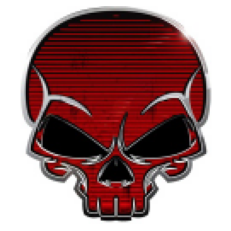

In [3]:
imshow(img)

In [4]:
import torch
wimg = torch.stack([img.view(3,IMSIZE,IMSIZE) ,img.view(3,IMSIZE,IMSIZE)])#example pic


In [5]:
from mok_mas_gan2.RaGAN.Conv2dBlock import Conv2dBlock
from mok_mas_gan2.RaGAN.JsonDataLoader import JsonDataLoader


gen = JsonDataLoader('/content/mok_mas_gan2/RaGAN/generator.json')
gen_params = gen.get_data()

dis = JsonDataLoader('/content/mok_mas_gan2/RaGAN/discriminator.json')
dis_params = dis.get_data()

In [6]:

from mok_mas_gan2.RaGAN.Generator import Generator
from mok_mas_gan2.RaGAN.Discriminator import Discriminator


disc = Discriminator(dis_params)
gen = Generator(gen_params)

In [38]:
# from mok_mas_gan2.RaGAN.FinalLoss import FinalLoss
from mok_mas_gan2.RaGAN.Loss import MeanLoss
from mok_mas_gan2.RaGAN.AL import AdversialLoss
from mok_mas_gan2.RaGAN.FML import FML
from mok_mas_gan2.RaGAN.SGRL import SGRL
from mok_mas_gan2.RaGAN.GL import GeometricLoss
from torchvision.models import vgg19




ml = MeanLoss() 
ml(wimg, wimg)             #usual mean eror: GT, fake ,for G

labels = torch.Tensor([1,1])# labels fake or not
al = AdversialLoss()
al(wimg,labels, disc) # adversial error: fake, labels, disc for disc

fml = FML()
fml(wimg,wimg, disc.local_branch)#feature matching error: GT, fake , local branch for G 
fml(wimg,wimg, vgg19(True).features[:5]) # GT, fake , vgg feature matching for G

sgrl = SGRL()
sgrl(wimg,wimg)#self guid regression loss : GT, fake  for G

gl  = GeometricLoss()
gl(wimg,wimg) #geom align loss : GT, fake 

torch.Size([2, 1024])
torch.Size([2, 1024])


tensor(0., grad_fn=<SumBackward0>)

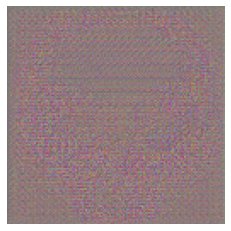

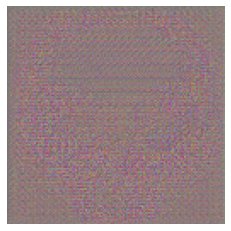

In [8]:
for i in gen(wimg):
  imshow(i.detach())
  

In [9]:
disc(wimg)

torch.Size([2, 1024])


tensor([[0.4796],
        [0.4796]], grad_fn=<SigmoidBackward>)